In [27]:
import h5py
import numpy as np
from trc import TRCData
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

joint_name = ['HeadF', 'HeadB', 'HeadL', 'SpineF', 'SpineM', 'SpineL', 
            'Offset1', 'Offset2', 'HipL', 'HipR', 'ElbowL', 'ArmL', 
            'ShoulderL', 'ShoulderR', 'ElbowR', 'ArmR', 'KneeR', 
            'KneeL', 'ShinL', 'ShinR']

joints_idx = [[1, 2], [2, 3], [1, 3], [2, 4], [1, 4], [3, 4], [4, 5], 
            [5, 6], [4, 7], [7, 8], [5, 8], [5, 7], [6, 8], [6, 9], 
            [6, 10], [11, 12], [4, 13], [4, 14], [11, 13], [12, 13], 
            [14, 15], [14, 16], [15, 16], [9, 18], [10, 17], [18, 19], 
            [17, 20]]

In [28]:
# Loading mat file and returning file
def loadMatFile(fileName):
    mat = h5py.File(fileName)
    return mat

In [29]:
mat = loadMatFile('VAE_mat_files/temporal_data.mat')
perproc = mat['markers_preproc']

In [30]:
data_points = []

for i in joint_name:
    data_points.append(np.array(perproc[i]).T)

temp = np.array(list(zip(*data_points)))
temp = temp.swapaxes(1,2)
print(temp.shape)
print(temp[0])


(540000, 3, 20)
[[ -54.37897591  -67.31701257  -46.84490403  -84.4172605  -109.50713293
  -136.42087853  -80.96743305  -99.57799851 -118.20385296 -155.26020495
   -49.85196801  -50.85646218  -67.99678805  -94.90567194  -88.42459604
   -76.61856746 -145.10854016  -94.78976945  -94.36301757 -146.84619953]
 [-260.42068029 -256.56540218 -243.38102601 -207.15533762 -193.653953
  -143.03607565 -185.25001055 -163.19276165 -122.0740461  -148.63579661
  -183.3618682  -192.0562533  -192.23342767 -212.74112298 -204.27961456
  -208.27428213 -165.2247326  -128.76551881 -115.82609468 -155.64482627]
 [  50.35284446   64.99757382   82.30706384   65.32175475   79.42043359
    81.53347316   74.25339517   82.10364543   74.56116491   51.7981333
    28.4513333    21.67350698   68.35260354   44.5271342     7.62757589
     2.17202662   39.81575394   71.10852539   51.09891234   24.63513253]]


In [33]:
# Plot 3D points given file and frame number
def plotKnownOrder(matFile, numb):
    mat = matFile[numb]
    x = mat[0]
    y = mat[1]
    z = mat[2]

    # loading plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # adding points, labels and lines
    try:
        ax.scatter(x,y,z, color='#ff5e5e', s =10, marker='x')
    except:
        pass
    # addLabels(ax, x, y, z)
    drawLines(ax, x, y, z)
    drawAllLines(ax, x, y, z)

    # Labeling plot
    ax.set_title("Rat positioning")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.show()

# Draw major lines in the rat model
def drawLines(ax,x, y, z):
    # run through all the connections to draw the points
    for i in range(len(joints_idx)):
        try: 
            # Getting both points to draw line
            idx = joints_idx[i]
            x_line = [x[idx[0]-1], x[idx[1]-1]]
            y_line = [y[idx[0]-1], y[idx[1]-1]]
            z_line = [z[idx[0]-1], z[idx[1]-1]]
            z_coord_1 = x[idx[0]-1], y[idx[0]-1], z[idx[0]-1]
            z_coord_2 = x[idx[1]-1], y[idx[1]-1], z[idx[1]-1]

            # Draw lines
            if i < 3: 
                ax.plot(x_line, y_line, z_line, c="#064ea1", linewidth=4)
            elif i < 6:
                ax.plot(x_line, y_line, z_line, c="#64ccd1", linewidth=4)
            else:
                ax.plot(x_line, y_line, z_line, c="#46b8a7", linewidth=4)
        except:
            pass

# Draw all line from every point 
def drawAllLines(ax,x, y, z):
    joint_len = len(joint_name)
    all_lines = []
    distance = []

    for i in range(joint_len):
        point_dist = []
        for j in range(joint_len):
            # point_dist.append(measureDistance(x[i], y[i], z[i], x[j], y[j], z[j]))
            if (not([i,j] in all_lines)):
                x_line = [x[i], x[j]]
                y_line = [y[i], y[j]]
                z_line = [z[i], z[j]]
                ax.plot(x_line, y_line, z_line, color='#b1d8fc', linewidth=0.5)
                all_lines.append([i,j])
                all_lines.append([j,i])
    #     distance.append(point_dist)
    # return distance

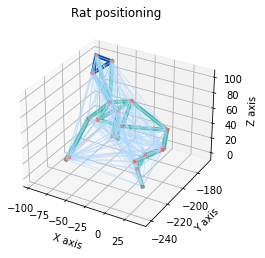

In [36]:
plotKnownOrder(temp, 12456)